In [22]:
import pandas as pd # for data manipulation operations
import numpy as np # for linear algebra
from scipy import stats
import matplotlib.pyplot as plt

In [190]:
missing_values = ["n/a", "na", "--"]
spanish_wine=pd.read_csv('/Users/mac/Desktop/DATA/portfolio/3.Spanish_wine_tableau/wines_SPA.csv',na_values=missing_values)

In [242]:
spanish_wine['year'] = spanish_wine['year'].replace('N.V.', np.NaN)
spanish_wine = spanish_wine.dropna()
spanish_wine['year'] = spanish_wine['year'].astype(np.int64)
spanish_wine=spanish_wine.drop(columns=['country'])

/var/folders/rx/mzh_4k4s58l_tqgs48pwftfc0000gn/T/ipykernel_58888/3868427783.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_spanish=sns.heatmap(spanish_wine.corr(), annot=True, cmap='Blues')


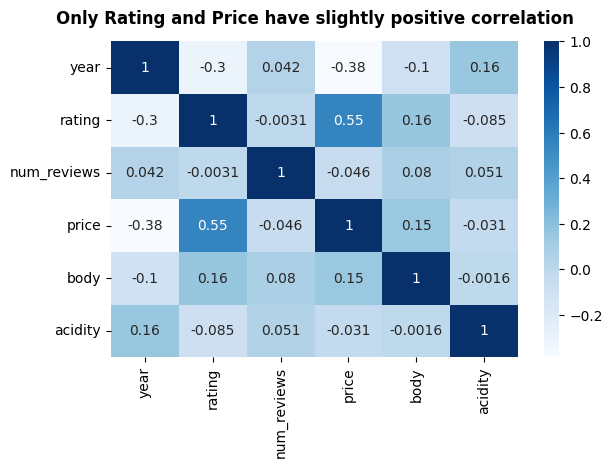

In [248]:
corr_spanish=sns.heatmap(spanish_wine.corr(), annot=True, cmap='Blues')
corr_spanish.set_title("Only Rating and Price have slightly positive correlation", y=1.03, fontweight ="bold")
plt.tight_layout()
plt.savefig('/Users/mac/Desktop/corr_spanishwine.jpg',dpi=300)


In [191]:
#spanish_wine.isnull().sum()# 1169 NaN value in body and 1169 NaN value in acididy
#0 in spanish_wine.values #No zero values
spanish_wine.dropna(inplace=True)

In [192]:
from scipy.stats.stats import pearsonr
corr_price_review,p_value=pearsonr(spanish_wine.num_reviews, spanish_wine.price)
print('Correlation between price and number of reviews is {0}, and P value is {1}, which indicates the result is statistically significant.'.format(corr_price_review,p_value))

Correlation between price and number of reviews is -0.040498128500941866, and P value is 0.0012707064729613107, which indicates the result is statistically significant.


/var/folders/rx/mzh_4k4s58l_tqgs48pwftfc0000gn/T/ipykernel_58888/2915168553.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [20]:
X=spanish_wine[['acidity','body']]
Y=spanish_wine.rating

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=10)
from sklearn.linear_model import LinearRegression
lr_rating=LinearRegression()
lr_rating.fit(X_train,y_train)

LinearRegression()

In [13]:
rating_coef=lr_rating.coef_
rating_intercept=lr_rating.intercept_
print('The Mutiple Linear Regression funciton of rating will be : Rating=acidity*{: .2f}+body*{: .2f}+{: .2f}.'.format(rating_coef[0],rating_coef[1],rating_intercept))

The Mutiple Linear Regression funciton of rating will be : Rating=acidity*-0.05+body* 0.03+ 4.26.


In [14]:
lr_rating_predict=lr_rating.predict(X_train)
from sklearn.metrics import r2_score
r2_score(y_train,lr_rating_predict)

0.03433348848311579

In [82]:
lr_rating_predict_test=lr_rating.predict(X_test)
r2_score(y_test,lr_rating_predict_test)

0.03473752781076189

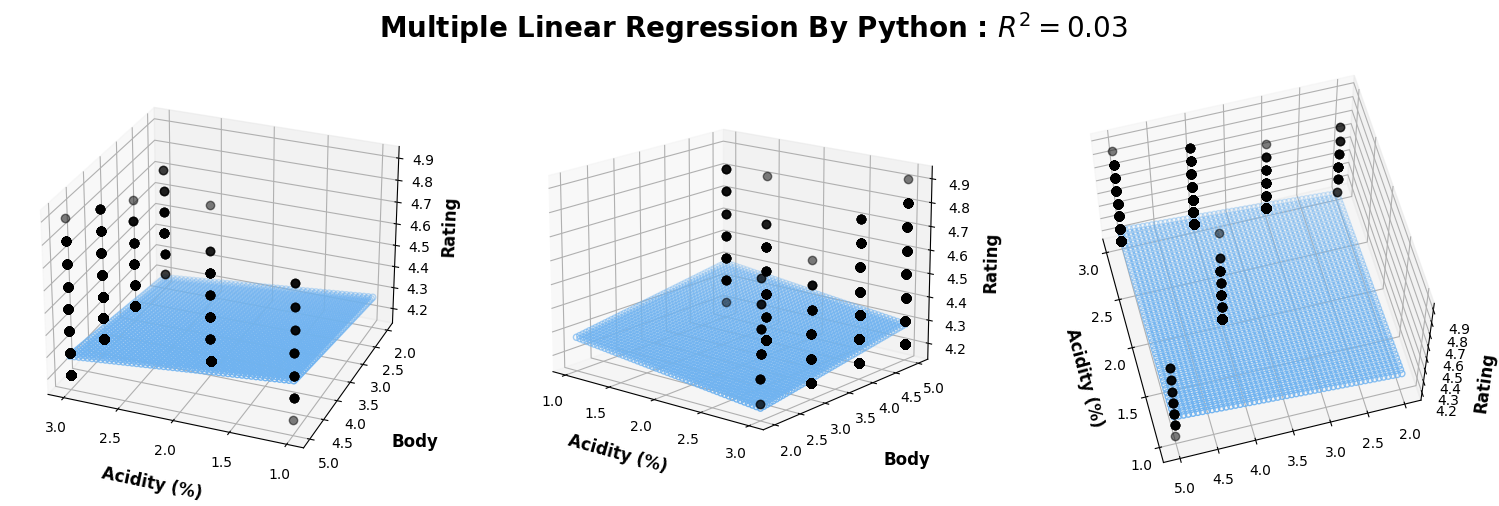

In [52]:
x = X[:, 0]
y = X[:, 1]
z = Y
x_pred = np.linspace(1, 3)   # range of porosity values
y_pred = np.linspace(2, 5)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

ols = LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

r2 = model.score(X, Y)

plt.style.use('default')

fig = plt.figure(figsize=(16, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Acidity (%)', fontsize=12,fontweight='bold',labelpad=10)
    ax.set_ylabel('Body', fontsize=12,fontweight='bold',labelpad=20)
    ax.set_zlabel('Rating', fontsize=12,fontweight='bold',labelpad=5)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

#ax1.text2D(0.2, 0.32,'aegis4048.github.io', fontsize=13, ha='center', va='center',transform=ax1.transAxes, color='grey', alpha=0)
#ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',transform=ax2.transAxes, color='grey', alpha=0)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',transform=ax3.transAxes, color='grey', alpha=0)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('Multiple Linear Regression By Python : $R^2 = %.2f$' % r2, fontsize=20,fontweight='bold')

fig.tight_layout()
plt.savefig('/Users/mac/Desktop/MLR.jpg',dpi=300)

In [53]:
spanish_wine.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

In [226]:
#rating_above_avg=spanish_wine.loc[(spanish_wine['price']>=20) & (spanish_wine['price']<=30)]
rioja=spanish_wine.price.loc[(spanish_wine['type'].str.contains('Rioja'))]
rioja.mean()

44.77460160438772

In [250]:
spanish_wine.rating.describe()


count    6070.000000
mean        4.260115
std         0.125122
min         4.200000
25%         4.200000
50%         4.200000
75%         4.300000
max         4.900000
Name: rating, dtype: float64

In [229]:
spanish_wine.corr()

/var/folders/rx/mzh_4k4s58l_tqgs48pwftfc0000gn/T/ipykernel_58888/1774881218.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spanish_wine.corr()


,rating,num_reviews,price,body,acidity
rating,1.000000,-0.009426,0.551707,0.162480,-0.094204
num_reviews,-0.009426,1.000000,-0.040498,0.064757,0.040229
price,0.551707,-0.040498,1.000000,0.153200,-0.033091
body,0.162480,0.064757,0.153200,1.000000,-0.018187
acidity,-0.094204,0.040229,-0.033091,-0.018187,1.000000


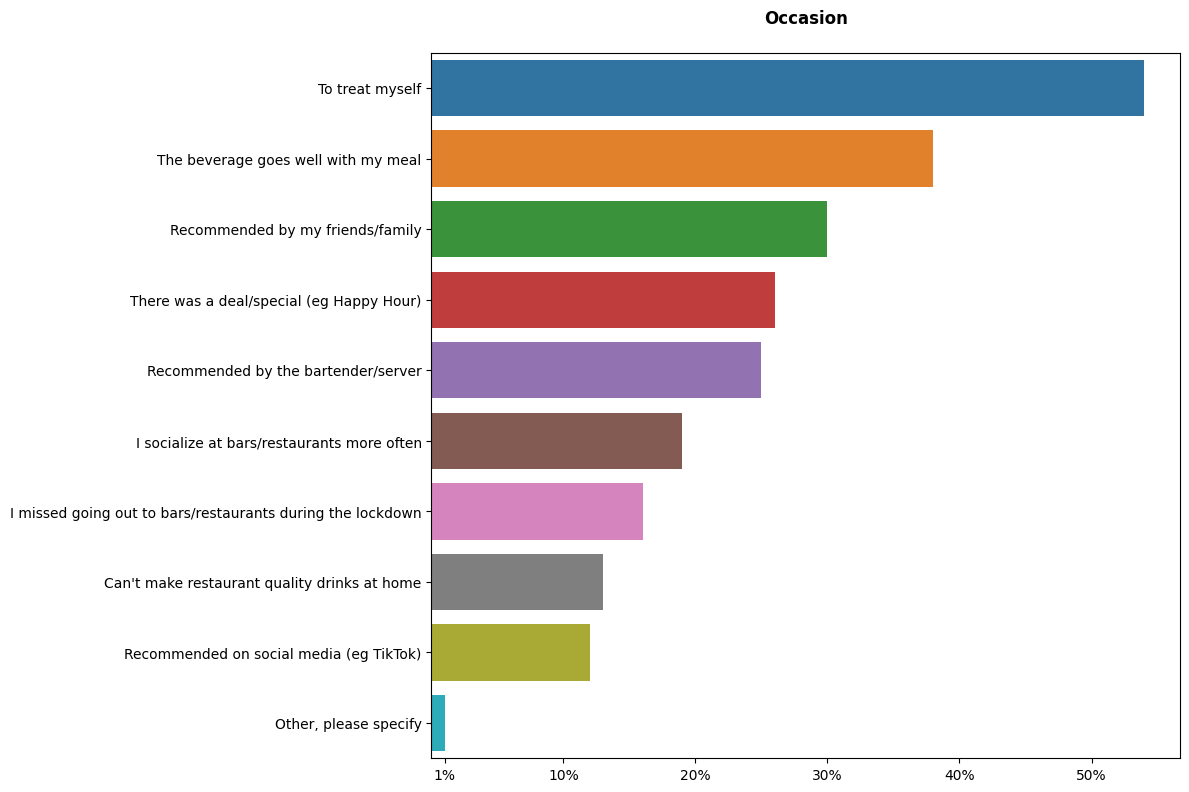

In [149]:
plt.figure(figsize=(12,8))
occasion_percent=[46,27]
occasion_label=['trust online experts',
'social media',
'Recommended by my friends/family',
'There was a deal/special (eg Happy Hour)',
'Recommended by the bartender/server',
'I socialize at bars/restaurants more often',
'I missed going out to bars/restaurants during the lockdown',
"Can't make restaurant quality drinks at home",
'Recommended on social media (eg TikTok)',
'Other, please specify']
occasion_plot=sns.barplot(y=occasion_label,x=occasion_percent)
occasion_plot.set_title('Occasion', y=1.03, fontweight ="bold")
occasion_plot.set_xticks([1,10,20,30,40,50])
occasion_plot.set_xticklabels(['1%','10%','20%','30%','40%','50%'])
plt.tight_layout()
plt.savefig('/Users/mac/Desktop/occasion_percent.jpg',dpi=300)